# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [49]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [51]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

#1 Distribution

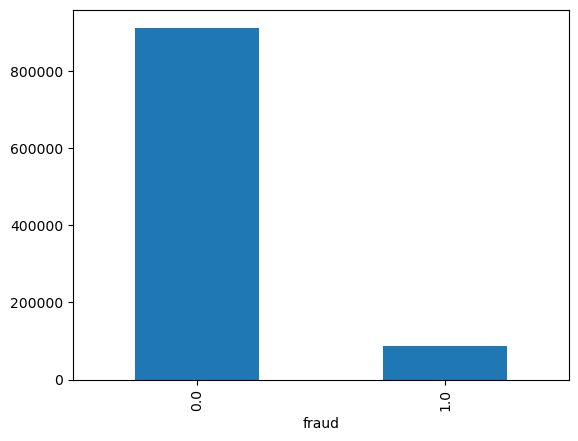

In [55]:
fraudulent = fraud['fraud'].value_counts()
fraudulent.plot(kind='bar')
plt.show()

Yes, this is an imbalanced dataset

#2 Logistic Regression

In [59]:
features = fraud.drop(columns=['fraud'])
target = fraud['fraud']

X_train, X_test, y_train, y_test = train_test_split(features, target)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

#3 Model Evaluation

In [62]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228186
         1.0       0.89      0.60      0.72     21814

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000



#4 Oversampling

In [93]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
train['fraud'] = y_train.values

fraudulent = train[train['fraud'] == 1]
not_fraudulent = train[train['fraud'] == 0]

yes_oversampled = resample(fraudulent, replace=True, n_samples = len(not_fraudulent), random_state=0)

train_over = pd.concat([yes_oversampled, not_fraudulent])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
496734,-0.109344,-0.171881,1.850249,0.366073,1.363078,-0.334663,0.732228,1.0
486203,3.429116,-0.130332,0.826385,0.366073,1.363078,-0.334663,0.732228,1.0
522780,-0.336903,-0.096254,1.027786,0.366073,1.363078,-0.334663,0.732228,1.0
244931,-0.374926,-0.180650,1.291791,0.366073,-0.733634,-0.334663,0.732228,1.0
478615,-0.313517,-0.192457,3.470086,0.366073,1.363078,-0.334663,0.732228,1.0
...,...,...,...,...,...,...,...,...
749992,-0.359712,-0.123962,0.238641,0.366073,1.363078,-0.334663,0.732228,0.0
749993,-0.048203,-0.192045,-0.433520,0.366073,1.363078,-0.334663,0.732228,0.0
749995,0.929411,0.087998,-0.524432,0.366073,-0.733634,-0.334663,0.732228,0.0
749998,-0.360875,0.091409,-0.270047,0.366073,1.363078,-0.334663,-1.365695,0.0


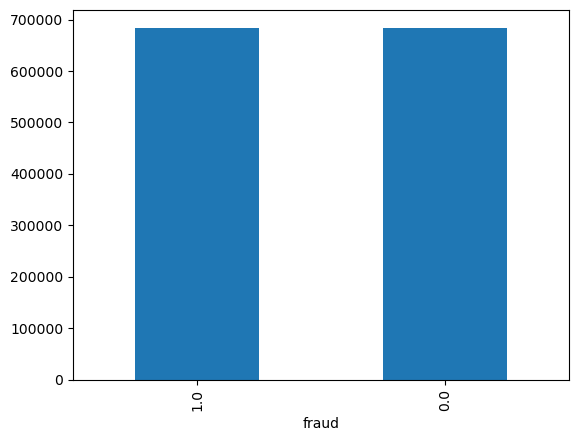

In [95]:
fraudulent_plt = train_over['fraud'].value_counts()
fraudulent_plt.plot(kind='bar')
plt.show()

In [101]:
X_train_over = train_over.drop(columns = ['fraud'])
y_train_over = train_over['fraud']

log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228186
         1.0       0.58      0.95      0.72     21814

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



Performance improves when we do oversampling

#5 Undersampling

In [105]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
train['fraud'] = y_train.values

fraudulent = train[train['fraud'] == 1]
not_fraudulent = train[train['fraud'] == 0]

yes_undersampled = resample(not_fraudulent, replace=True, n_samples = len(fraudulent), random_state=0)

train_under = pd.concat([yes_undersampled, fraudulent])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
334840,0.300566,-0.192261,0.422235,0.366073,-0.733634,-0.334663,-1.365695,0.0
477752,-0.141186,0.024161,-0.323132,0.366073,-0.733634,-0.334663,0.732228,0.0
129264,-0.393472,0.471525,-0.427115,-2.731693,-0.733634,-0.334663,0.732228,0.0
166815,1.058975,0.191900,-0.430292,0.366073,1.363078,-0.334663,-1.365695,0.0
394251,-0.336716,-0.075533,-0.093406,0.366073,1.363078,-0.334663,0.732228,0.0
...,...,...,...,...,...,...,...,...
749978,-0.207183,-0.147389,2.273088,0.366073,1.363078,-0.334663,0.732228,1.0
749979,2.039231,-0.189761,-0.122928,0.366073,-0.733634,-0.334663,0.732228,1.0
749994,1.595069,-0.188108,-0.406314,0.366073,-0.733634,-0.334663,0.732228,1.0
749996,-0.341101,-0.180389,2.268055,0.366073,-0.733634,-0.334663,0.732228,1.0


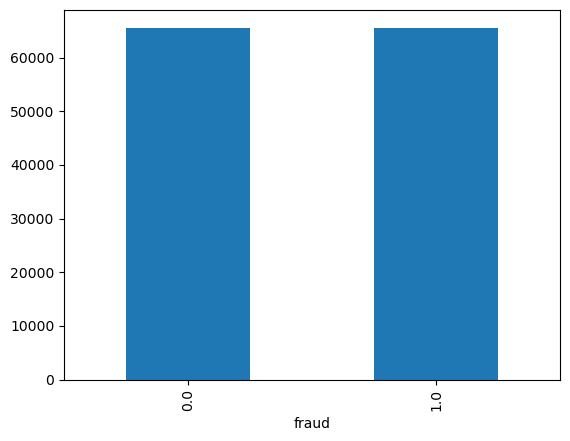

In [107]:
fraudulent_plt = train_under['fraud'].value_counts()
fraudulent_plt.plot(kind='bar')
plt.show()

In [109]:
X_train_under = train_under.drop(columns = ['fraud'])
y_train_under = train_under['fraud']

log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228186
         1.0       0.57      0.95      0.72     21814

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



Performance improves when we do undersampling but  a little less than oversampling

#6 SMOTE

In [115]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 1,sampling_strategy=1.0)

X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228186
         1.0       0.58      0.95      0.72     21814

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



Performance improves and is slightly better than undersampling but still less overall than oversampling. The best performer is the oversample method